In [1]:
import pandas as pd
data=pd.read_csv('dsdsd.csv',header=-1)

In [2]:
X=data[[1,2]]
Y=data[0]

In [3]:
X.head()

,1,2
0,-0.663827,-0.138526
1,1.994596,2.468025
2,-1.247395,0.749425
3,2.309374,1.899836
4,0.849143,2.407750


In [4]:
import numpy as np

In [5]:
def M(x,y,w):
    return y*np.dot(x,w)
def L(m):
    return np.log(1+np.exp(-m))
def dL(m):
    return -np.exp(-m)/(1+np.exp(-m))
def Q(w):
    return -(-1/Y.size* (L(M(X,Y,w)).sum()))
def sigma(m):
    return (1+np.exp(-m))**(-1)

In [33]:
def graddecent(k,C,imax):
    wa=np.array([])
    w=np.zeros(2)
    wn=np.zeros(2)
    
    
    l=Y.size
    for i in np.arange(imax):
        g1=g2=0
        for yi,xi in zip(Y.values,X.values):
            g1+=yi*xi[0]*(1-1/(1+np.exp(-yi*(w[0]*xi[0]+w[1]*xi[1]))))
            g2+=yi*xi[1]*(1-1/(1+np.exp(-yi*(w[0]*xi[0]+w[1]*xi[1]))))
            
        wn[0]=w[0]*(1-C*k)+k/l* g1
        wn[1]=w[1]*(1-C*k)+k/l *g2
    
        wa=np.append(wa,w)
        w=wn
    return w,wa

def graddecent2(k,C,imax):
    wa=np.array([])
    w=np.zeros(2)
    wn=np.zeros(2)
    
    
    l=Y.size
    for i in np.arange(imax):
        
        g=np.dot((e(-M(X.values,Y.values,w))/(1+e(-M(X.values,Y.values,w)))*Y.values),X.values)  
        
        wn=w*(1-C*k)+k/l*g
        wa=np.append(wa,w)
        w=wn
    return w,wa

In [17]:
from numpy import exp as e
xii,yii=X.values[1],Y.values[1]
w=np.random.rand(2)

In [20]:
M(X.values[:5],Y.values[:5],w)

array([ 0.65460217,  2.41221392,  1.01090379,  2.58503811,  1.32147682])

In [21]:
xii=X.values[:5]
yii=Y.values[:5]

In [32]:
np.dot((e(-M(xii,yii,w))/(1+e(-M(xii,yii,w)))*yii),xii)

array([ 1.06456496,  0.69060507])

In [22]:
gr=-xii*yii*e(-M(xii,yii,w))/(1+e(-M(xii,yii,w)))
print gr

ValueError: operands could not be broadcast together with shapes (5,2) (5,) 

In [38]:
ww,wa1=graddecent2(0.1,0,1000)

In [8]:
import matplotlib.pyplot as plot
%matplotlib inline


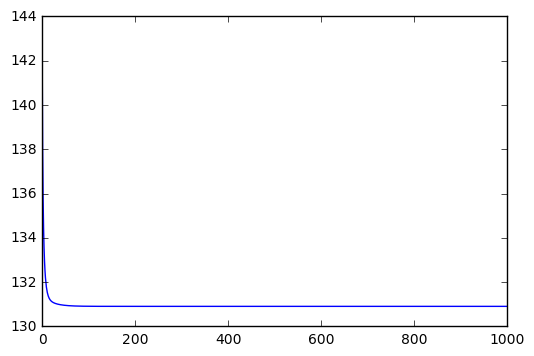

In [39]:
plot.plot([Q(wa) for wa in wa1.reshape(1000,2)])

In [31]:
print sklearn.metrics.accuracy_score(Y,2*np.array([h(ww,x)>=0.5 for x in X.values])-1)
print sklearn.metrics.accuracy_score(Y,clf.predict(X))

0.736585365854
0.878048780488


In [30]:
def h(w,x):
    return (1+np.exp(-np.dot(w,x)))**(-1)

In [69]:
print ww

[ 0.04076046  0.03788512]


In [28]:
import sklearn.linear_model
import sklearn

In [47]:
sklearn.metrics.roc_auc_score(Y,np.array([h(ww,x) for x in X.values]))

0.92676190476190479

In [43]:
ww1,wa2=graddecent(0.1,10,1000)

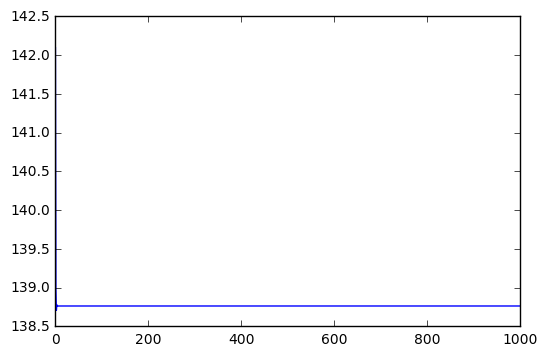

In [44]:
plot.plot([Q(wa) for wa in wa2.reshape(1000,2)])

In [46]:
sklearn.metrics.roc_auc_score(Y,np.array([h(ww1,x) for x in X.values]))

0.93628571428571417